In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.transforms as transforms
import seaborn as sns

In [51]:
sns.set(style='whitegrid')

In [5]:
samples = ['BLCA', 'BRCA', 'CESC', 'CHOL',
           'COAD', 'ESCA', 'GBM', 'HNSC',
           'KICH', 'KIRC', 'LUAD', 'LUSC', 
           'PAAD', 'PCPG', 'PRAD', 'READ',
           'SARC', 'STAD', 'THCA', 'THYM', 'UCEC']

tissues = ['bladder', 'esophagus', 'kidney', 
           'liver', 'lung', 'stomach']

In [188]:
def isoform_viz(cancer, norm, subset=None, swarm=False, save=False):
    global samples
    if not subset:
        subset = samples
        
    samples_c = []
    samples_n = []
    
    for s in subset:
        samples_c.append(pd.read_csv(f'../data/tcga_initial/{s}_canc.tsv', sep='\t'))
        samples_n.append(pd.read_csv(f'../data/tcga_initial/{s}_norm.tsv', sep='\t'))
    
    iso_avg_cc = []
    iso_avg_cn = []
    
    for s in samples_c:
        if cancer in s['UniProt'].to_list():
            iso_avg_cc.append(np.log(s[s['UniProt'] == cancer].iloc[:,6:].to_numpy()[0]+1))
        else:
            iso_avg_cc.append([0])
        
        if norm in s['UniProt'].to_list():
            iso_avg_cn.append(np.log(s[s['UniProt'] == norm].iloc[:,6:].to_numpy()[0]+1))
        else:
            iso_avg_cn.append([0])
            
    iso_avg_nc = []
    iso_avg_nn = []
    
    for s in samples_n:
        if cancer in s['UniProt'].to_list():
            iso_avg_nc.append(np.log(s[s['UniProt'] == cancer].iloc[:,6:].to_numpy()[0]+1))
        else:
            iso_avg_nc.append([0])
        
        if norm in s['UniProt'].to_list():
            iso_avg_nn.append(np.log(s[s['UniProt'] == norm].iloc[:,6:].to_numpy()[0]+1))
        else:
            iso_avg_nn.append([0])
        
    fig, ax = plt.subplots(figsize=(4*len(subset),6))
    
    trans_label = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    
    ax.boxplot(x = iso_avg_cc, positions=np.arange(stop=4*len(subset), step=4)-3.9, showfliers=False,
                labels=[cancer,]*len(subset), patch_artist=True, boxprops={'facecolor':'C3'}, medianprops={'color':'black'})
    ax.boxplot(x = iso_avg_cn, positions=np.arange(stop=4*len(subset), step=4)-3.1, showfliers=False, 
                labels=[norm,]*len(subset), patch_artist=True, boxprops={'facecolor':'C2'}, medianprops={'color':'black'})
    ax.boxplot(x = iso_avg_nc, positions=np.arange(stop=4*len(subset), step=4)-1.9, showfliers=False, 
                labels=[cancer,]*len(subset), patch_artist=True, boxprops={'facecolor':'C3'}, medianprops={'color':'black'})
    ax.boxplot(x = iso_avg_nn, positions=np.arange(stop=4*len(subset), step=4)-1.1, showfliers=False,
                labels=[norm,]*len(subset), patch_artist=True, boxprops={'facecolor':'C2'}, medianprops={'color':'black'})
    
    ymin, ymax = plt.ylim()
    ax.set_ylim(bottom=0, top=1.15*ymax)
    ax.set_ylabel('ln(TPM+1)')
    
    for i in range(len(subset)):
        ax.text(i*4-3.5,-0.12,'Cancer', ha='center', transform=trans_label)
        ax.text(i*4-1.5,-0.12,'Norm', ha='center', transform=trans_label)
        ax.text(i*4-2.5,-0.16, subset[i], ha='center', transform=trans_label)
        
    legends = [Line2D([0], [0], marker='o', color='w', markerfacecolor='C3', markersize=12, label='Isoform prevailing in Cancer'),
               Line2D([0], [0], marker='o', color='w', markerfacecolor='C2', markersize=12, label='Isoform prevailing in Norm')]
    
    plt.subplots_adjust(top=0.8)
    ax.legend(handles=legends, loc='upper right')
    plt.savefig('viztest2.png', dpi=300, bbox_inches='tight')

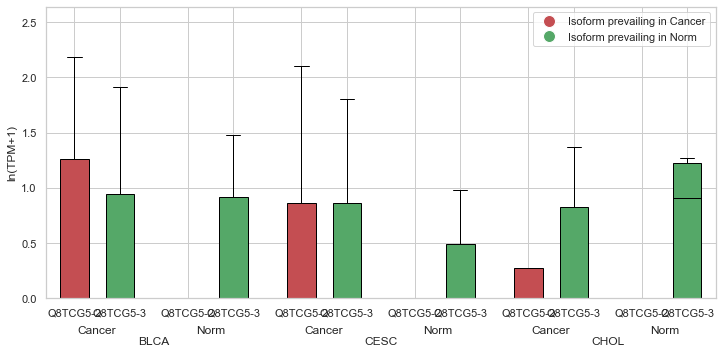

In [191]:
isoform_viz(cancer='Q8TCG5-2', norm='Q8TCG5-3', subset=['BLCA', 'CESC', 'CHOL'])

In [175]:
x = pd.read_csv(f'../data/tcga_initial/CESC_norm.tsv', sep='\t')

In [176]:
x[x['UniProt'] == 'Q9UQ84']

,UniProt,canonical,chr,Gene,ucsc,Avg,TCGA-FU-A3EO-11A-13R-A213-07,TCGA-HM-A3JJ-11A-12R-A21T-07,TCGA-MY-A5BF-11A-11R-A26T-07


In [23]:
x = pd.read_csv(f'../data/tcga_initial/BLCA_canc.tsv', sep='\t')

In [47]:
['Q8WWZ4-4']*3

['Q8WWZ4-4', 'Q8WWZ4-4', 'Q8WWZ4-4']

In [48]:
cancer = 'ooooo'
[cancer]

['ooooo']

In [59]:
tips = sns.load_dataset("tips")

In [60]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
def isoform_viz(cancer, norm, subset=None, swarm=False, save=False):
    global samples
    if not subset:
        subset = samples
        
    samples_c = []
    samples_n = []
    
    for s in subset:
        samples_c.append(pd.read_csv(f'../data/tcga_initial/{s}_canc.tsv', sep='\t'))
        samples_n.append(pd.read_csv(f'../data/tcga_initial/{s}_norm.tsv', sep='\t'))
    
    iso_avg_cc = []
    iso_avg_cn = []
    
    for s in samples_c:
        if cancer in s['UniProt'].to_list():
            iso_avg_cc.append(s[s['UniProt'] == cancer].iloc[:,6:].to_numpy()[0])
        else:
            iso_avg_cc.append(np.zeros(len(s.columns)-6))
        
        if norm in s['UniProt'].to_list():
            iso_avg_cn.append(s[s['UniProt'] == norm].iloc[:,6:].to_numpy()[0])
        else:
            iso_avg_cn.append(np.zeros(len(s.columns)-6))
            
    iso_avg_nc = []
    iso_avg_nn = []
    
    for s in samples_n:
        if cancer in s['UniProt'].to_list():
            iso_avg_nc.append(s[s['UniProt'] == cancer].iloc[:,6:].to_numpy()[0])
        else:
            iso_avg_nc.append(np.zeros(len(s.columns)-6))
        
        if norm in s['UniProt'].to_list():
            iso_avg_nn.append(s[s['UniProt'] == norm].iloc[:,6:].to_numpy()[0])
        else:
            iso_avg_nn.append(np.zeros(len(s.columns)-6))
        
    fig, ax = plt.subplots(figsize=(4*len(subset),6))
    
    ax.grid(visible=False, axis='y')
    trans_label = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    
    cancer_x_all = []
    norm_x_all = []
    cancer_x_labels = []
    norm_x_labels = []
    
    x = 0
    for i in range(len(subset)):
        cancer_x_all.append(np.linspace(x,x+0.2*(len(iso_avg_cc[i])-1),len(iso_avg_cc[i])))
        cancer_x_labels.append(np.array([(x+0.2*len(iso_avg_cc[i])-1)/2]))
        x += (0.2*len(iso_avg_cc[i])-1)+1
        norm_x_all.append(np.linspace(x,x+0.2*(len(iso_avg_nc[i])-1),len(iso_avg_cc[i])))
        norm_x_labels.append(np.array([(x+0.2*len(iso_avg_nc[i])-1)/2]))
        x += (0.2*len(iso_avg_nc[i])-1)+1
        
    iso_avg_cc = np.concatenate(iso_avg_cc).ravel()
    iso_avg_cn = np.concatenate(iso_avg_cn).ravel()
    iso_avg_nc = np.concatenate(iso_avg_nc).ravel()
    iso_avg_nn = np.concatenate(iso_avg_nn).ravel()
    
    iso_avg_cn = np.add(iso_avg_cc, iso_avg_cn)
    iso_avg_nn = np.add(iso_avg_nc, iso_avg_nn)
    
    cancer_x_all = np.concatenate(cancer_x_all).ravel()
    cancer_x_labels = np.concatenate(cancer_x_labels).ravel()
    norm_x_all = np.concatenate(norm_x_all).ravel()
    norm_x_labels = np.concatenate(norm_x_labels).ravel()
    
    plt.bar(x=cancer_x_all, height=iso_avg_cn, width=0.2, color='C3')
    plt.bar(x=cancer_x_all, height=iso_avg_cc, width=0.2, color='C2')
    
    plt.bar(x=norm_x_all, height=iso_avg_nn, width=0.2, color='C3')
    plt.bar(x=norm_x_all, height=iso_avg_nc, width=0.2, color='C2')

In [20]:
np.linspace(0,0+0.2*19,20)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (701,) and arg 1 with shape (22,).

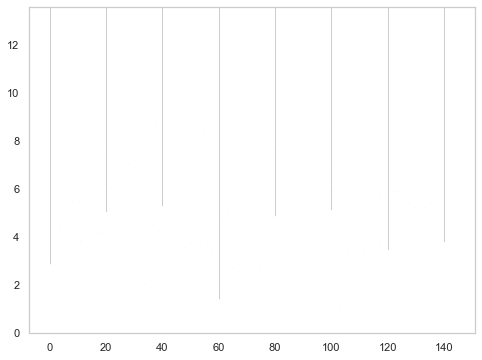

In [53]:
isoform_viz(cancer='Q8TCG5-2', norm='Q8TCG5-3', subset=['BLCA', 'CESC'])

In [71]:
sc = pd.read_csv(f'../data/tcga_initial/BLCA_canc.tsv', sep='\t')
sn = pd.read_csv(f'../data/tcga_initial/BLCA_norm.tsv', sep='\t')

In [167]:
iso_avg_cc = sc[sc['UniProt'] == 'Q12791-6'].iloc[:,6:].to_numpy()[0]
iso_avg_cn = sc[sc['UniProt'] == 'Q12791-5'].iloc[:,6:].to_numpy()[0]
iso_avg_nc = sn[sn['UniProt'] == 'Q12791-6'].iloc[:,6:].to_numpy()[0]
iso_avg_nn = sn[sn['UniProt'] == 'Q12791-5'].iloc[:,6:].to_numpy()[0]

In [168]:
cancer_x_all = []
norm_x_all = []
x_labels = []

x = 0
cancer_x_all.append(np.linspace(x,x+0.2*(len(iso_avg_cc)-1),len(iso_avg_cc)))
x_labels.append(np.array([(x+(0.2*(len(iso_avg_cc)-1))/2)]))
x += (0.2*len(iso_avg_cc)-1)+4
norm_x_all.append(np.linspace(x,x+0.2*(len(iso_avg_nc)-1),len(iso_avg_nc)))
x_labels.append(np.array([(x+(0.2*(len(iso_avg_nc)-1))/2)]))
x += (0.2*len(iso_avg_nc)-1)+4

In [169]:
iso_avg_cn = np.add(iso_avg_cc, iso_avg_cn)
iso_avg_cn_sort = bell_sort(iso_avg_cn)
iso_avg_cn = iso_avg_cn[iso_avg_cn_sort[::-1]]
iso_avg_cc = iso_avg_cc[iso_avg_cn_sort[::-1]]

iso_avg_nn = np.add(iso_avg_nc, iso_avg_nn)
iso_avg_nn_sort = bell_sort(iso_avg_nn)
iso_avg_nc = iso_avg_nc[iso_avg_nn_sort[::-1]]
iso_avg_nn = iso_avg_nn[iso_avg_nn_sort[::-1]]

In [170]:
iso_avg_nc

array([0.        , 3.64615113, 6.94254266, 4.36440434, 3.83091445,
       4.98319884, 5.85675667, 6.15663729, 5.92902401, 5.9862926 ,
       6.53655807, 6.22781615, 5.67678643, 6.0269129 , 3.41390544,
       4.04413179, 3.29598745, 3.62344551, 3.20817387])

In [171]:
iso_avg_nn_sort

array([10,  7,  5,  4, 15, 18,  9,  8,  0,  3,  2,  1, 11, 14, 16, 13, 12,
        6, 17], dtype=int64)

In [172]:
cancer_x_all = np.concatenate(cancer_x_all).ravel()
x_labels = np.concatenate(x_labels).ravel()
norm_x_all = np.concatenate(norm_x_all).ravel()

In [173]:
len(norm_x_all)

19

In [174]:
x_labels

array([40.4, 85.8])

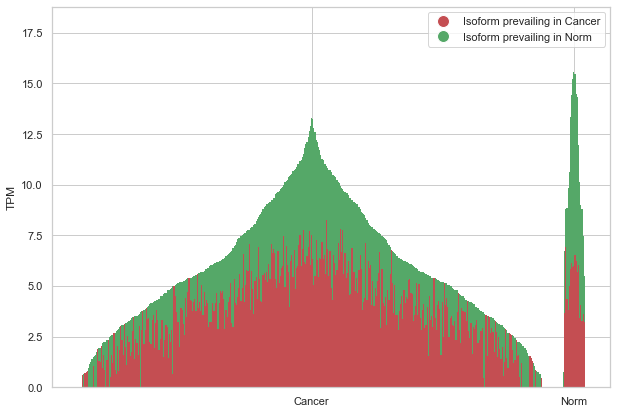

In [179]:
plt.figure(figsize=(10,7))

plt.bar(x=cancer_x_all, height=iso_avg_cn, width=0.2, color='C2', linewidth=0)
plt.bar(x=cancer_x_all, height=iso_avg_cc, width=0.2, color='C3', linewidth=0)

plt.bar(x=norm_x_all, height=iso_avg_nn, width=0.2, color='C2', linewidth=0)
plt.bar(x=norm_x_all, height=iso_avg_nc, width=0.2, color='C3', linewidth=0)

plt.xticks(x_labels, ['Cancer', 'Norm'])


plt.ylabel('TPM')
legends = [Line2D([0], [0], marker='o', color='w', markerfacecolor='C3', markersize=12, label='Isoform prevailing in Cancer'),
               Line2D([0], [0], marker='o', color='w', markerfacecolor='C2', markersize=12, label='Isoform prevailing in Norm')]

ymin, ymax = plt.ylim()
plt.ylim(bottom=0, top=1.15*ymax)
plt.legend(handles=legends, loc='upper right')
plt.savefig('viz3.png', dpi=300, bbox_inches='tight')

In [132]:
cancer_x_labels

array([40.])

In [111]:
from collections import deque

def bell_sort(arr):
    arr = arr.copy()
    inds = deque()
    i = len(arr)
    while i > 0:
        inds.append(arr.argmax())
        arr[arr.argmax()] = -1
        i -= 1
        if i != 0:
            inds.appendleft(arr.argmax())
            arr[arr.argmax()] = -1
            i -= 1
            
    return np.array(inds)

In [107]:
iso_avg_cc.argmax()

157

In [108]:
iso_avg_cc[[157]]

array([8.2600633])

In [110]:
bell_sort(iso_avg_cc)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  30,  19,  30,  30,  27,  22,  42,  66,  57,  52,
        55,  16,  61,  27,  59,  10,  23,  32,  40,  94,  61,   5,  78,
        49,  67,  74,  50,  44,  44,  22,  90,  96, 110, 109,  45,  51,
       106,  42, 125,  83, 138,  25,   0,   0,  68,  45,  34, 119,  48,
        20, 155, 116,  31,  76,  45, 152, 125, 107, 130, 114,  91,  97,
       136,  15,  95,  97, 112,  76,  61,  79,  17,  80,  63, 121,  16,
       156, 188, 148, 104,  66, 109, 194, 104, 203,  33, 192,  69,  63,
       171,  80, 141, 135,  25, 182, 179,  32,  86, 186, 218,  60, 231,
       170,  17,  98, 128,  30,  40,  99, 126, 154, 146, 132,  52, 275,
        12, 188,  47,  23, 212, 138, 146,  99, 141,  23, 130, 217,  77,
       200, 262, 130, 159, 135, 186, 108, 151, 272, 109,  96, 191,  88,
       196, 183, 214, 172, 334,  59, 193,  81, 313,  97, 248, 12